# for classification

In [1]:
# change run time to t4 GPU
# Gpu used for big datset

In [41]:
import pandas as pd
from warnings import filterwarnings
filterwarnings('ignore')

In [42]:
df=pd.read_csv('train.csv')

In [43]:
df

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0,0
1,1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0,0
2,2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0,0
3,3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0,0
4,4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42095,42095,3,0,0,4,0,0,1,160,2018,12,30,1,0,0,0,140.00,2,1
42096,42096,2,0,0,3,0,0,0,34,2017,9,23,0,0,0,0,224.67,0,0
42097,42097,2,0,0,2,2,0,0,292,2018,7,21,0,0,0,0,96.00,0,0
42098,42098,1,0,0,3,0,0,0,5,2018,11,9,0,0,0,0,120.00,0,0


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42100 entries, 0 to 42099
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id                                    42100 non-null  int64  
 1   no_of_adults                          42100 non-null  int64  
 2   no_of_children                        42100 non-null  int64  
 3   no_of_weekend_nights                  42100 non-null  int64  
 4   no_of_week_nights                     42100 non-null  int64  
 5   type_of_meal_plan                     42100 non-null  int64  
 6   required_car_parking_space            42100 non-null  int64  
 7   room_type_reserved                    42100 non-null  int64  
 8   lead_time                             42100 non-null  int64  
 9   arrival_year                          42100 non-null  int64  
 10  arrival_month                         42100 non-null  int64  
 11  arrival_date   

In [45]:
# separete input and output

In [46]:
X=df.drop(labels=['id','booking_status'],axis=1)
Y=df[['booking_status']]

In [47]:
Y.value_counts()

booking_status
0                 25596
1                 16504
Name: count, dtype: int64

<Axes: xlabel='booking_status'>

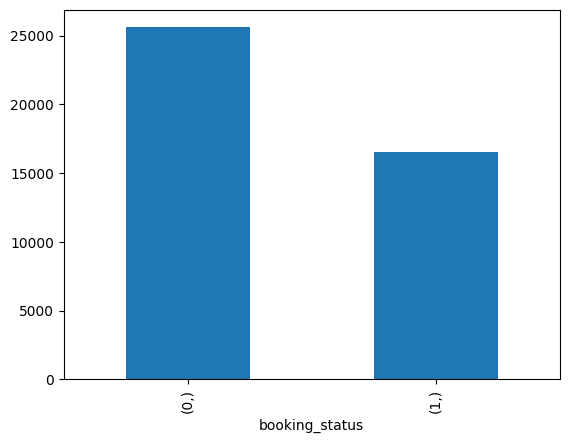

In [48]:
Y.value_counts().plot(kind='bar')

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
ss=StandardScaler()

In [51]:
X=pd.DataFrame(ss.fit_transform(X),columns=X.columns)

In [52]:
X

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,0.151040,-0.313454,-0.998814,-0.278849,1.294624,-0.160945,-0.515173,-1.170469,0.409661,-2.330398,-0.214091,0.428551,5.766758,33.699120,-0.101479,-0.998052,-0.737691
1,0.151040,-0.313454,0.130259,-0.278849,-0.407020,-0.160945,-0.515173,0.161740,0.409661,-0.209778,1.473487,-1.149928,-0.173408,-0.060506,-0.101479,-0.870153,-0.737691
2,0.151040,-0.313454,-0.998814,-0.979466,-0.407020,-0.160945,-0.515173,2.604122,0.409661,1.557404,-1.564154,-1.149928,-0.173408,-0.060506,-0.101479,-1.415406,-0.737691
3,-1.753925,-0.313454,-0.998814,-0.278849,1.294624,-0.160945,-0.515173,-0.886758,0.409661,1.557404,-1.676659,0.428551,-0.173408,-0.060506,-0.101479,-1.307702,-0.737691
4,0.151040,-0.313454,0.130259,-1.680084,-0.407020,-0.160945,-0.515173,1.901012,0.409661,0.850531,0.010919,-1.149928,-0.173408,-0.060506,-0.101479,-0.122955,-0.737691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42095,2.056005,-0.313454,-0.998814,1.122386,-0.407020,-0.160945,0.685890,0.692156,0.409661,1.557404,1.585992,0.428551,-0.173408,-0.060506,-0.101479,0.954088,1.842849
42096,0.151040,-0.313454,-0.998814,0.421768,-0.407020,-0.160945,-0.515173,-0.862087,-2.441040,0.497095,0.798456,-1.149928,-0.173408,-0.060506,-0.101479,3.233919,-0.737691
42097,0.151040,-0.313454,-0.998814,-0.278849,2.996268,-0.160945,-0.515173,2.320411,0.409661,-0.209778,0.573445,-1.149928,-0.173408,-0.060506,-0.101479,-0.230659,-0.737691
42098,-1.753925,-0.313454,-0.998814,0.421768,-0.407020,-0.160945,-0.515173,-1.219810,0.409661,1.203968,-0.776617,-1.149928,-0.173408,-0.060506,-0.101479,0.415567,-0.737691


In [53]:
# chweck outleirs
out=[]
for i in X.columns:
    ol=X[(X[i]>3)|(X[i]<-3)].index
    out.extend(ol)

In [54]:
out

[5,
 82,
 168,
 273,
 477,
 630,
 859,
 1116,
 1613,
 2660,
 2951,
 3034,
 3044,
 3347,
 3564,
 3923,
 4099,
 4118,
 4356,
 4435,
 4641,
 4929,
 5031,
 5236,
 5396,
 5554,
 5591,
 6130,
 6449,
 6574,
 6904,
 7350,
 7400,
 7465,
 8037,
 8345,
 8361,
 8372,
 8711,
 8825,
 8902,
 9258,
 9323,
 9991,
 10387,
 10496,
 10509,
 10512,
 10621,
 10803,
 11081,
 11270,
 11331,
 12288,
 12669,
 12760,
 12860,
 13057,
 13222,
 13271,
 13479,
 13590,
 13612,
 14170,
 14251,
 14432,
 14492,
 14516,
 14581,
 14813,
 14819,
 14841,
 15873,
 15915,
 16113,
 16277,
 16438,
 16480,
 16829,
 16840,
 17087,
 17111,
 17217,
 17343,
 17546,
 17691,
 17924,
 18006,
 18027,
 18426,
 18445,
 18579,
 18583,
 19101,
 19126,
 19505,
 19750,
 20693,
 20929,
 20997,
 21137,
 21251,
 21338,
 21970,
 22658,
 23163,
 23226,
 23536,
 23616,
 23644,
 23701,
 24154,
 24176,
 24364,
 24997,
 25294,
 25485,
 26436,
 26449,
 26531,
 26532,
 26640,
 26744,
 26965,
 27438,
 27720,
 28024,
 28601,
 28794,
 29111,
 29129,
 29321

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=42)

In [57]:
xtrain.shape

(33680, 17)

In [58]:
xtest.shape

(8420, 17)

In [59]:
# build neural network

In [60]:
from keras.models import Sequential
from keras.layers import Input,Dense,Dropout # dropout overfitting ke liye uses hota hai bachane ke liye kuch nuerons drop hote hai

In [61]:
 # initialize the model
 model=Sequential()

 # input layers
 model.add(Input(shape=(xtrain.shape[1])))

# crete hodden layer 1
model.add(Dense(units=64,activation='relu'))

# add dropout layer
model.add(Dropout(rate=0.5))

# second hidden layer 2
model.add(Dense(units=32,activation='relu'))

# crete dropout
model.add(Dropout(rate=0.4))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

In [62]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [63]:
hist=model.fit(xtrain,ytrain,validation_split=0.2,epochs=100)

Epoch 1/100
842/842 [==============================] - 8s 8ms/step - loss: 0.5430 - accuracy: 0.7281 - val_loss: 0.4855 - val_accuracy: 0.7721
Epoch 2/100
842/842 [==============================] - 5s 6ms/step - loss: 0.4963 - accuracy: 0.7638 - val_loss: 0.4769 - val_accuracy: 0.7758
Epoch 3/100
842/842 [==============================] - 4s 4ms/step - loss: 0.4872 - accuracy: 0.7729 - val_loss: 0.4754 - val_accuracy: 0.7755
Epoch 4/100
842/842 [==============================] - 3s 4ms/step - loss: 0.4819 - accuracy: 0.7729 - val_loss: 0.4731 - val_accuracy: 0.7736
Epoch 5/100
842/842 [==============================] - 4s 5ms/step - loss: 0.4778 - accuracy: 0.7768 - val_loss: 0.4702 - val_accuracy: 0.7806
Epoch 6/100
842/842 [==============================] - 3s 4ms/step - loss: 0.4742 - accuracy: 0.7783 - val_loss: 0.4702 - val_accuracy: 0.7828
Epoch 7/100
842/842 [==============================] - 3s 4ms/step - loss: 0.4727 - accuracy: 0.7845 - val_loss: 0.4671 - val_accuracy: 0.7856

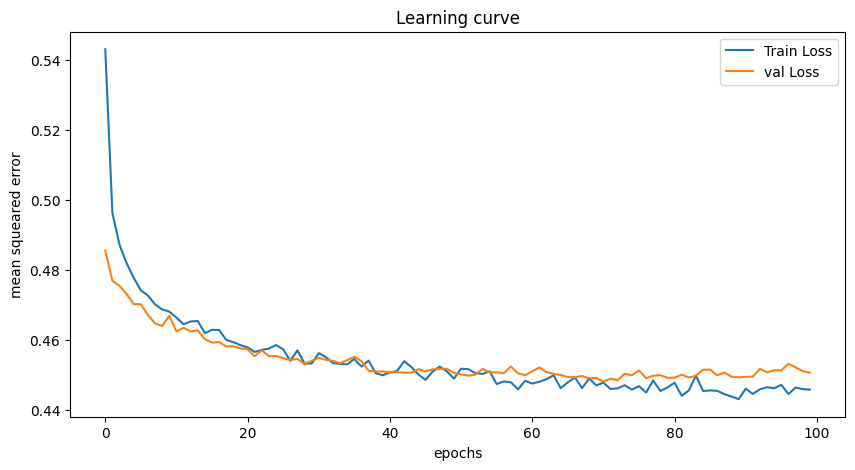

In [64]:
# plot the learning curve

import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(hist.history['loss'],label='Train Loss')
plt.plot(hist.history['val_loss'],label='val Loss')
plt.xlabel('epochs')
plt.ylabel('mean squeared error')
plt.legend()
plt.title('Learning curve')
plt.show()

In [65]:
model.evaluate(xtest,ytest)

264/264 [==============================] - 1s 5ms/step - loss: 0.4360 - accuracy: 0.8072


[0.43599700927734375, 0.8072446584701538]

In [66]:
model.evaluate(xtrain,ytrain)

1053/1053 [==============================] - 3s 3ms/step - loss: 0.4288 - accuracy: 0.8078


[0.4288373589515686, 0.807838499546051]

In [68]:
tr_prob=model.predict(xtrain)
ts_prob =model.predict(xtest)

264/264 [==============================] - 1s 3ms/step


In [70]:
tr_prob[:5] # sigmoid give probability

array([[0.00435888],
       [0.1534945 ],
       [0.81301403],
       [0.7192255 ],
       [0.7964388 ]], dtype=float32)

In [71]:
ts_prob[:5]

array([[0.04362835],
       [0.89102876],
       [0.3451602 ],
       [0.01491681],
       [0.20446204]], dtype=float32)

In [84]:
tr_pred=[]
for i in tr_prob:
    if i>=0.5:
        tr_pred.append(1)
    else:
        tr_pred.append(0)

In [85]:
tr_pred[:5]

[0, 0, 1, 1, 1]

In [86]:
ts_pred=[]
for i in ts_prob:
    if i>=0.5:
        ts_pred.append(1)
    else:
        ts_pred.append(0)

In [88]:
ts_pred[:5]

[0, 1, 0, 0, 0]

In [90]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay

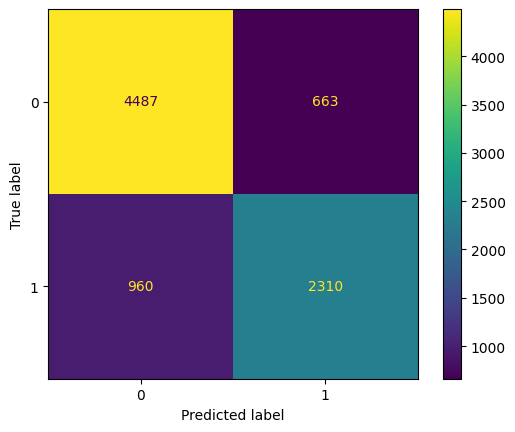

In [91]:
cf=confusion_matrix(ytest,ts_pred)
cfd=ConfusionMatrixDisplay(cf)
cfd.plot()

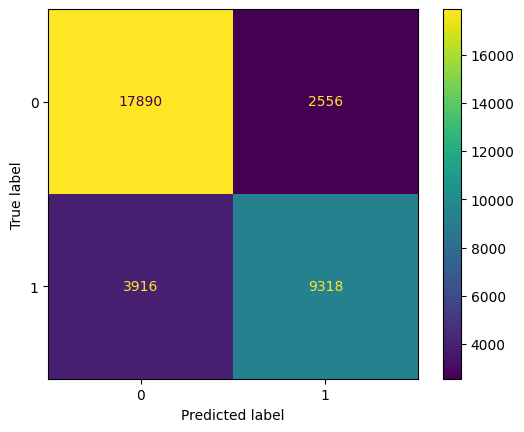

In [92]:
cf=confusion_matrix(ytrain,tr_pred)
cfd=ConfusionMatrixDisplay(cf)
cfd.plot()

In [93]:
# saving model

In [94]:
model.save('BookingModel.keras')

In [95]:
# predictions of test dataset

In [96]:
df1=pd.read_csv('test.csv')

In [97]:
Xt=pd.DataFrame(ss.fit_transform(df1),columns=df1.columns)

In [98]:
Xt.head()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,-1.731989,2.061087,-0.314961,0.126652,1.149127,-0.402773,-0.1666,0.685799,0.088181,0.408978,1.559433,-1.216381,0.435667,-0.178001,-0.060829,-0.101336,0.297557,1.853010
1,-1.731866,0.160920,-0.314961,-1.011996,0.436464,-0.402773,-0.1666,-0.518770,-1.008778,-2.445121,0.853184,0.574448,-1.154075,-0.178001,-0.060829,-0.101336,-0.533552,-0.745231
2,-1.731742,0.160920,4.156621,-1.011996,-0.988861,-0.402773,-0.1666,3.094937,-1.058079,0.408978,0.146934,-0.656747,0.435667,-0.178001,-0.060829,-0.101336,3.676312,0.553890
3,-1.731619,0.160920,-0.314961,-1.011996,0.436464,-0.402773,-0.1666,-0.518770,-0.195303,0.408978,-0.912440,1.581790,-1.154075,-0.178001,-0.060829,-0.101336,-0.648983,-0.745231
4,-1.731495,-1.739248,-0.314961,-1.011996,-0.276199,3.038115,-0.1666,-0.518770,-1.193658,0.408978,0.500059,0.574448,0.435667,-0.178001,-0.060829,-0.101336,1.068913,-0.745231


In [99]:
Xt=Xt.drop(labels=['id'],axis=1)

In [100]:
Xt.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2.061087,-0.314961,0.126652,1.149127,-0.402773,-0.1666,0.685799,0.088181,0.408978,1.559433,-1.216381,0.435667,-0.178001,-0.060829,-0.101336,0.297557,1.853010
1,0.160920,-0.314961,-1.011996,0.436464,-0.402773,-0.1666,-0.518770,-1.008778,-2.445121,0.853184,0.574448,-1.154075,-0.178001,-0.060829,-0.101336,-0.533552,-0.745231
2,0.160920,4.156621,-1.011996,-0.988861,-0.402773,-0.1666,3.094937,-1.058079,0.408978,0.146934,-0.656747,0.435667,-0.178001,-0.060829,-0.101336,3.676312,0.553890
3,0.160920,-0.314961,-1.011996,0.436464,-0.402773,-0.1666,-0.518770,-0.195303,0.408978,-0.912440,1.581790,-1.154075,-0.178001,-0.060829,-0.101336,-0.648983,-0.745231
4,-1.739248,-0.314961,-1.011996,-0.276199,3.038115,-0.1666,-0.518770,-1.193658,0.408978,0.500059,0.574448,0.435667,-0.178001,-0.060829,-0.101336,1.068913,-0.745231


In [109]:
prob=model.predict(Xt)

878/878 [==============================] - 5s 6ms/step


In [110]:
prob[:5]

array([[0.07098007],
       [0.04740286],
       [0.3710131 ],
       [0.18061654],
       [0.63080543]], dtype=float32)

In [111]:
pred=[]
for i in prob:
    if i>=0.5:
        pred.append(1)
    else:
        pred.append(0)

In [112]:
pred[:5]

[0, 0, 0, 0, 1]

In [113]:
df_results=df1[['id']]

In [116]:
df_results.head()

,id
0,42100
1,42101
2,42102
3,42103
4,42104


In [117]:
df_results['booking_status']=pred

In [118]:
df_results['probability']=prob

In [120]:
df_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28068 entries, 0 to 28067
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              28068 non-null  int64  
 1   booking_status  28068 non-null  int64  
 2   probability     28068 non-null  float32
dtypes: float32(1), int64(2)
memory usage: 548.3 KB


In [121]:
df_results.head()

,id,booking_status,probability
0,42100,0,0.070980
1,42101,0,0.047403
2,42102,0,0.371013
3,42103,0,0.180617
4,42104,1,0.630805
